# Анализ данных банковских клиентов и их кредитной истории
Создан dataset с данными банковских клиентов и их кредитной истории.   
На каждую дату был проведен анализ определенного кредитного клиента, представлены данные о его категориях, кредитном рейтинге, количестве кредитов и количестве просрочек по этим кредитам.

## Гипотезы
Банк использует данные для сегментации и категоризации клиентов с целью принятия взвешенных бизнес-решений.

Гипотеза 1: Кредитный рейтинг не зависит от
возрастной группы  
Гипотеза 2: Возраст не влияет на просрочки   
Гипотеза 3: Уровень дохода не влияет на просрочки  
Гипотеза 4: Город проживания не влияет на кредитный рейтинг  
Гипотеза 5: Источник дохода не влияет на кредитный рейтинг  
Гипотеза 6: Пенсионеры не имеют меньше просрочек, чем работающие клиенты

## Визуализации

 Гипотеза 1: Кредитный рейтинг не зависит от возрастной группы

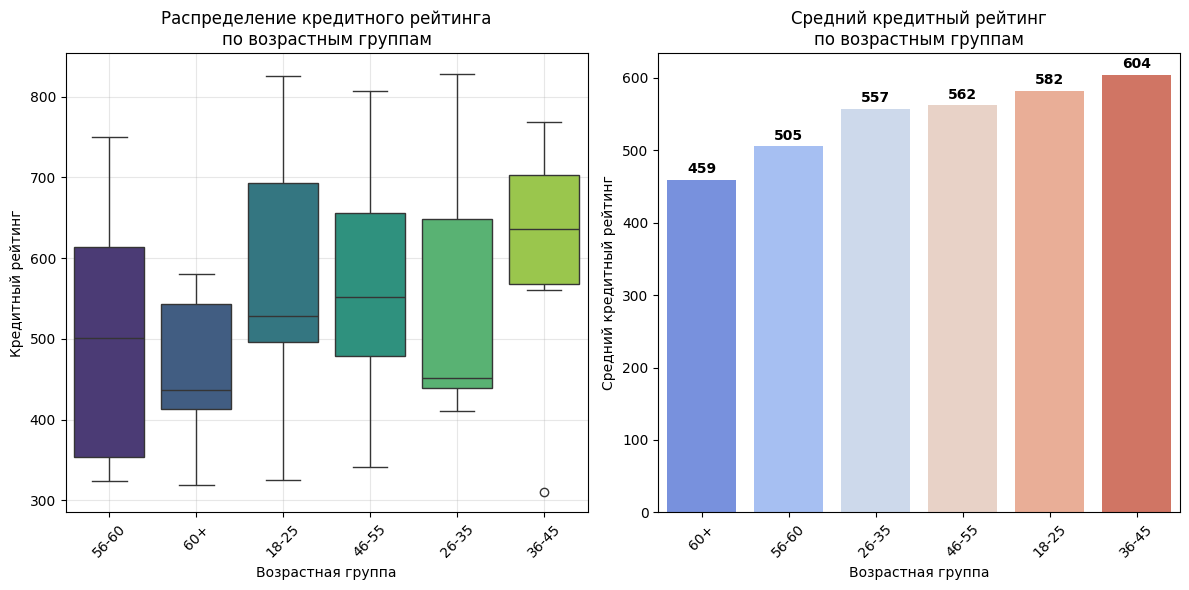

In [ ]:
# Гипотеза 1: Кредитный рейтинг не зависит от возрастной группы
plt.figure(figsize=(12, 6))

# График 1: Boxplot для распределения кредитного рейтинга по возрастным группам
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Возраст_группа', y='Кредитный_рейтинг', hue='Возраст_группа', palette='viridis', legend=False)
plt.title('Распределение кредитного рейтинга\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Кредитный рейтинг')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма средних значений
plt.subplot(1, 2, 2)
средний_рейтинг_по_возрасту = df.groupby('Возраст_группа')['Кредитный_рейтинг'].mean().sort_values()
sns.barplot(x=средний_рейтинг_по_возрасту.index, y=средний_рейтинг_по_возрасту.values,
            hue=средний_рейтинг_по_возрасту.index, palette='coolwarm', legend=False)
plt.title('Средний кредитный рейтинг\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний кредитный рейтинг')
plt.xticks(rotation=45)

# Добавление значений на столбцы
for i, v in enumerate(средний_рейтинг_по_возрасту.values):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Гипотеза ОПРОВЕРГНУТА: Кредитный рейтинг ЗАВИСИТ от возрастной группы"

Гипотеза 2: Возраст не влияет на просрочки

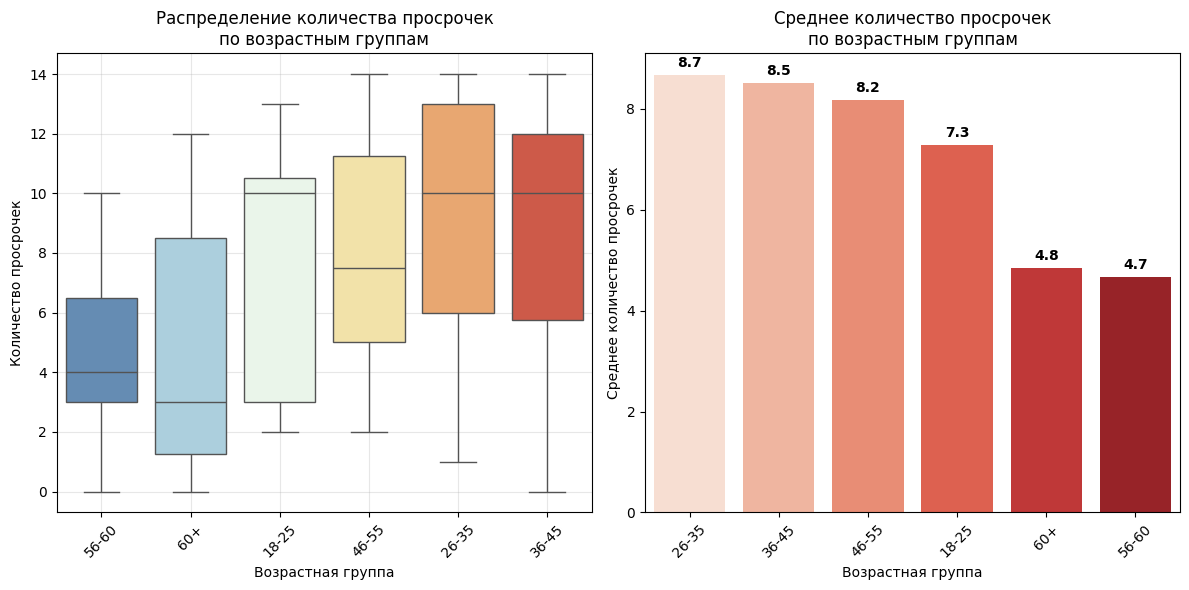

In [ ]:
# Гипотеза 2: Возраст не влияет на просрочки
plt.figure(figsize=(12, 6))

# График 1: Boxplot для распределения просрочек по возрастным группам
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Возраст_группа', y='Просрочки', hue='Возраст_группа', palette='RdYlBu_r', legend=False)
plt.title('Распределение количества просрочек\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество просрочек')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма средних значений просрочек
plt.subplot(1, 2, 2)
средние_просрочки_по_возрасту = df.groupby('Возраст_группа')['Просрочки'].mean().sort_values(ascending=False)
sns.barplot(x=средние_просрочки_по_возрасту.index, y=средние_просрочки_по_возрасту.values,
            hue=средние_просрочки_по_возрасту.index, palette='Reds', legend=False)
plt.title('Среднее количество просрочек\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее количество просрочек')
plt.xticks(rotation=45)

# Добавление значений на столбцы
for i, v in enumerate(средние_просрочки_по_возрасту.values):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Гипотеза ОПРОВЕРГНУТА: Возраст ВЛИЯЕТ на количество просрочек

Гипотеза 3: Уровень дохода не влияет на просрочки

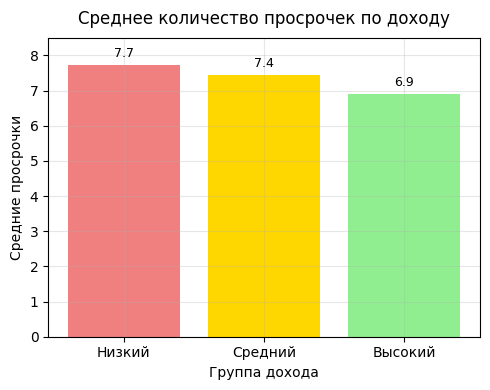

In [ ]:
# Гипотеза 3: Уровень дохода не влияет на просрочки

# Сначала создаем группы доходов
df['Группа_дохода'] = pd.cut(df['Доход'],
                            bins=[20000, 60000, 120000, 200000],
                            labels=['Низкий', 'Средний', 'Высокий'])

# Компактный размер
plt.figure(figsize=(5, 4))

средние_просрочки_по_доходу = df.groupby('Группа_дохода', observed=True)['Просрочки'].mean()

plt.bar(средние_просрочки_по_доходу.index, средние_просрочки_по_доходу.values,
        color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Среднее количество просрочек по доходу', fontsize=12, pad=10)
plt.xlabel('Группа дохода', fontsize=10)
plt.ylabel('Средние просрочки', fontsize=10)

# Автоматически настраиваем отступ и границы
max_value = средние_просрочки_по_доходу.max()
plt.ylim(0, max_value * 1.1)  # +10% сверху

for i, v in enumerate(средние_просрочки_по_доходу.values):
    plt.text(i, v + max_value * 0.02, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Гипотеза ОПРОВЕРГНУТА: уровень дохода влияет на просрочки

Гипотеза 4: Город проживания не влияет на кредитный рейтинг

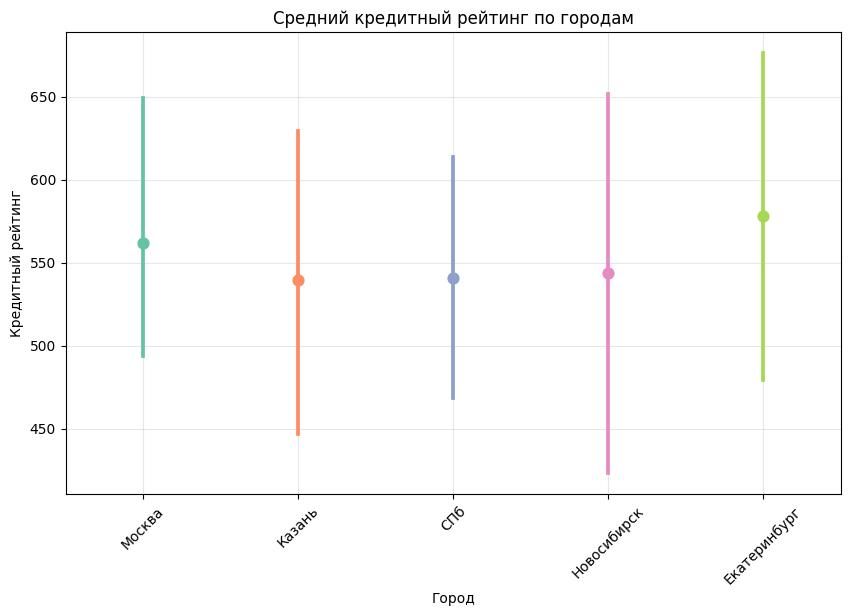

In [ ]:
# Гипотеза 4: Город проживания не влияет на кредитный рейтинг

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='Город', y='Кредитный_рейтинг', hue='Город', palette='Set2', legend=False)
plt.title('Средний кредитный рейтинг по городам')
plt.xlabel('Город')
plt.ylabel('Кредитный рейтинг')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


Гипотеза ОПРОВЕРГНУТА: город проживания влияет на кредитный рейтинг

Гипотеза 5: Источник дохода не влияет на кредитный рейтинг

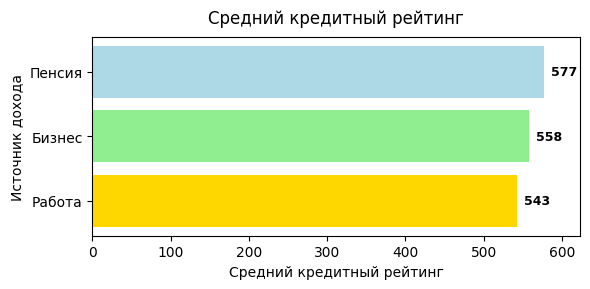

In [ ]:
# Гипотеза 5: Источник дохода не влияет на кредитный рейтинг
plt.figure(figsize=(6, 3))

средний_рейтинг = df.groupby('Источник_дохода')['Кредитный_рейтинг'].mean().sort_values()

plt.barh(средний_рейтинг.index, средний_рейтинг.values, color=['gold', 'lightgreen', 'lightblue'])
plt.title('Средний кредитный рейтинг', fontsize=12, pad=10)
plt.xlabel('Средний кредитный рейтинг', fontsize=10)
plt.ylabel('Источник дохода', fontsize=10)

# Автоматически настраиваем отступ и границы
max_value = средний_рейтинг.max()
plt.xlim(0, max_value * 1.08)

# Добавляем цифры на столбцы с автоматическим отступом
for i, v in enumerate(средний_рейтинг.values):
    plt.text(v + max_value * 0.015, i, f'{v:.0f}', ha='left', va='center',
             fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

Гипотеза ОПРОВЕРГНУТА: исочник дохода влияет на кредитный рейтинг

Гипотеза 6: Пенсионеры не имеют меньше просрочек, чем работающие клиенты

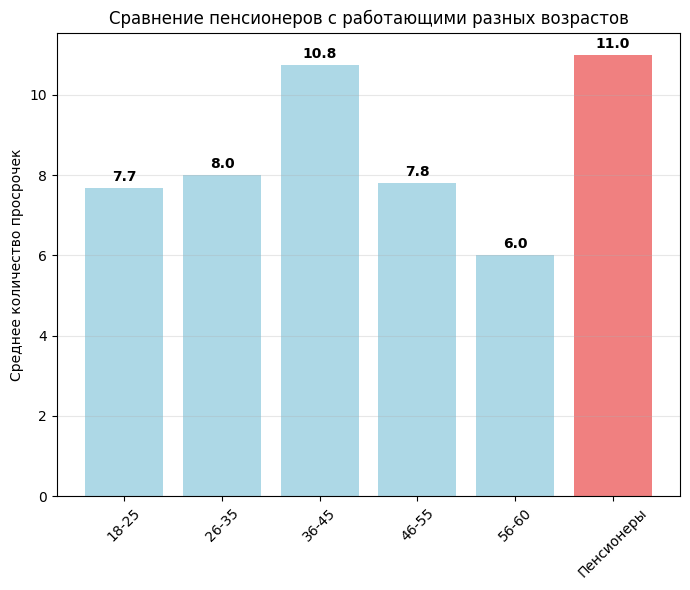

In [ ]:
# Гипотеза 6: Пенсионеры не имеют меньше просрочек, чем работающие клиенты

plt.figure(figsize=(7, 6))

# Сравниваем пенсионеров с работающими разных возрастов
работающие_по_возрасту = df[df['Источник_дохода'] == 'Работа'].groupby('Возраст_группа')['Просрочки'].mean()
пенсионеры_mean = пенсионеры['Просрочки'].mean()

# Создаем данные для графика
все_группы = list(работающие_по_возрасту.index) + ['Пенсионеры']
значения = list(работающие_по_возрасту.values) + [пенсионеры_mean]

colors = ['lightblue'] * len(работающие_по_возрасту) + ['lightcoral']

plt.bar(все_группы, значения, color=colors)
plt.title('Сравнение пенсионеров с работающими разных возрастов')
plt.ylabel('Среднее количество просрочек')

# Добавляем значения на столбцы
for i, v in enumerate(значения):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Гипотеза ПОДТВЕРЖДЕНА: пенсионеры не имеют меньше просрочек, чем работающие клиенты